In [1]:
from melconv import *
%matplotlib inline

In [2]:
dit=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\for-2seconds\training\real'
#met=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\melspectrograms\training\real/'
real_train=getdata(dit)
real_mel_train=real_train.data
real_mel_train[0]

No. of audio clips : 6978, Time taken : 104.4536702632904 seconds


array([[ -3.852558  ,  -0.7489046 ,   0.28681406,   0.35078707,
          0.25837398,  -2.1406057 ,  -7.10551   , -10.984575  ,
        -11.583158  ,  -7.3356366 ,  -6.798132  , -11.614962  ,
        -15.930996  , -18.011112  , -17.201427  ,  -5.4329257 ,
         -2.236794  ,  -1.6959097 ,  -1.3377404 ,  -1.0665646 ,
         -1.0392917 ,  -0.4189916 ,  -0.09179379,  -0.42147475,
         -1.0129894 ,  -1.2864888 ,  -1.6350662 ,  -2.7774315 ,
         -5.643757  ,  -5.129385  ,  -1.340821  ,  -0.20780101,
         -0.13952462,  -1.3414186 ,  -2.2342334 ,  -1.6975751 ,
         -2.5065007 ,  -2.871889  ,  -4.990429  , -10.0654125 ,
        -13.2219515 , -16.554949  , -18.933079  , -19.123642  ,
        -14.272146  ,  -5.8580112 ,  -3.7751148 ,  -4.817499  ,
         -9.094238  , -14.896303  , -16.630829  , -16.832346  ,
        -19.410301  , -16.308577  , -15.216349  , -11.167598  ,
         -4.984891  ,  -2.4921772 ,  -2.4420621 ,  -3.0801477 ,
         -3.8770022 ,  -5.1030107 ,  -6.

In [3]:
dit=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\for-2seconds\training\fake'
#met=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\melspectrograms\training\fake/'
fake_train=getdata(dit)
fake_mel_train=fake_train.data
fake_mel_train[0]

No. of audio clips : 6978, Time taken : 113.04179000854492 seconds


array([[ 6.39731526e-01,  4.49098539e+00,  4.06716299e+00,
         3.95765996e+00,  2.67441010e+00,  1.14781618e-01,
         1.25331473e+00,  2.54907179e+00,  3.46248817e+00,
         4.15780640e+00,  3.79785872e+00,  2.60456085e+00,
         2.74603891e+00,  2.87529898e+00, -4.61915106e-01,
        -8.75605774e+00, -7.03197098e+00, -1.62206995e+00,
         2.53525925e+00,  2.97114611e+00,  2.08916950e+00,
         1.84732306e+00, -2.96158969e-01, -6.14189243e+00,
        -9.00881386e+00, -3.28082776e+00,  3.99927855e-01,
         2.72421122e+00,  3.34538078e+00,  2.48629594e+00,
         4.01280451e+00,  3.63953733e+00,  1.48879433e+00,
        -5.25753736e+00, -8.67791271e+00, -6.34247875e+00,
        -2.07783413e+00,  1.96681511e+00,  3.02080774e+00,
         3.31550121e+00,  2.69729018e+00,  7.00386047e-01,
        -8.36184144e-01, -6.49307668e-01, -1.07833576e+00,
        -2.11970210e+00, -2.72569609e+00, -1.37483847e+00,
        -3.23097974e-01, -2.11805180e-01,  1.29498392e-0

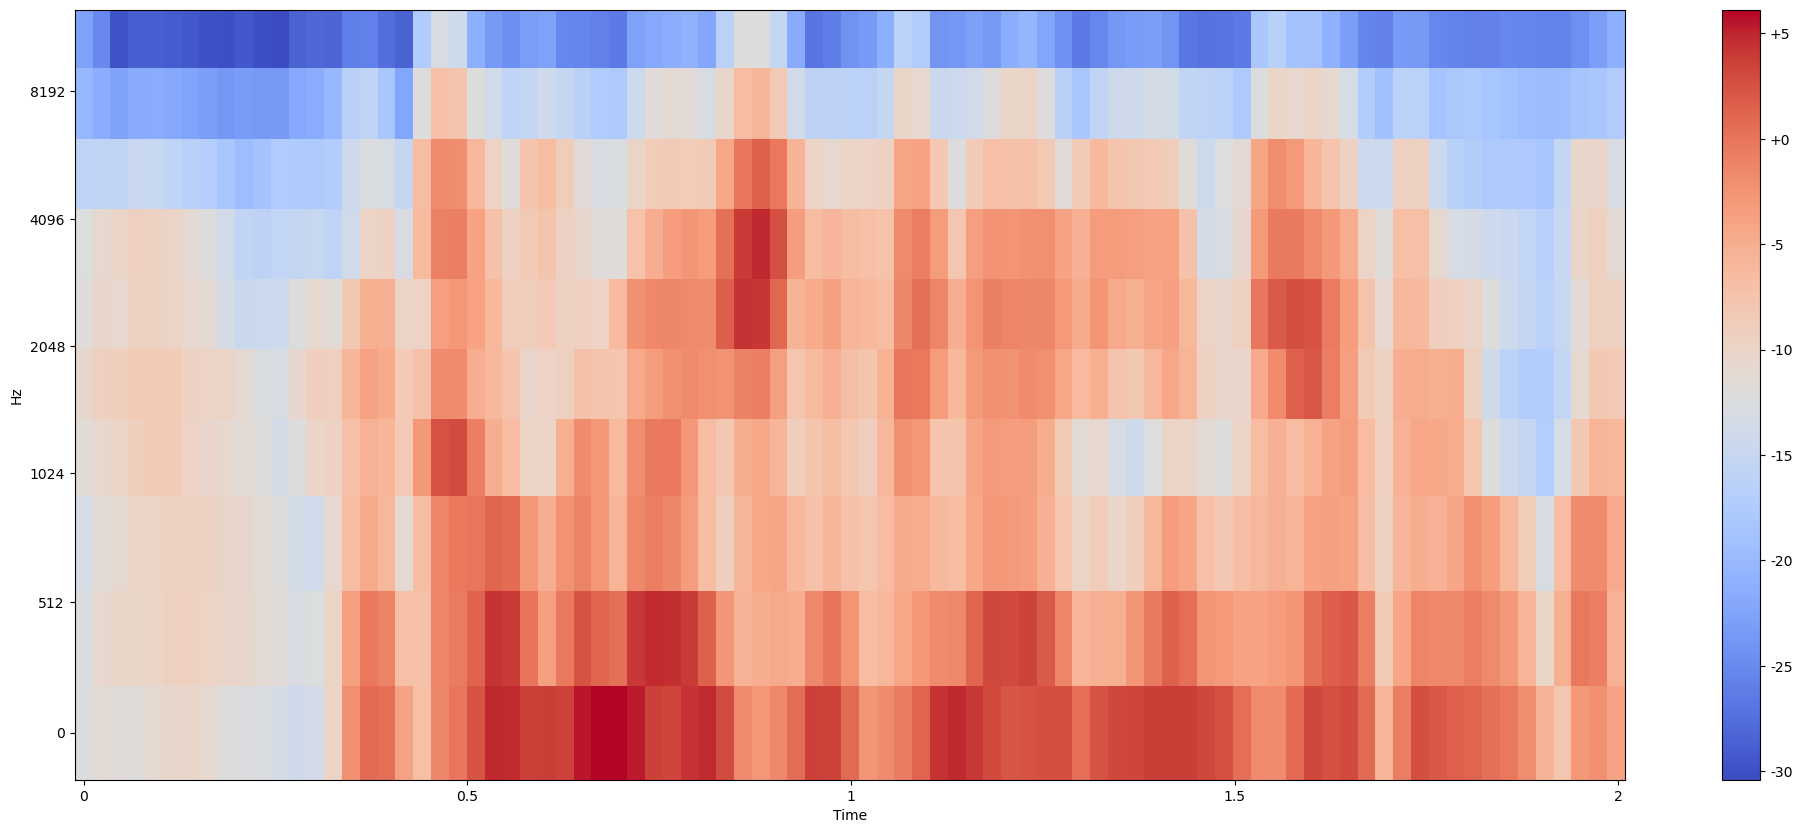

In [4]:
#Melspectrogram
plt.figure(figsize=(25,10))
librosa.display.specshow(real_mel_train[4000],x_axis="time",y_axis="mel",sr=22050)
plt.colorbar(format="%+2.f")
plt.show()

Text(200.97222222222223, 0.5, 'Amplitude')

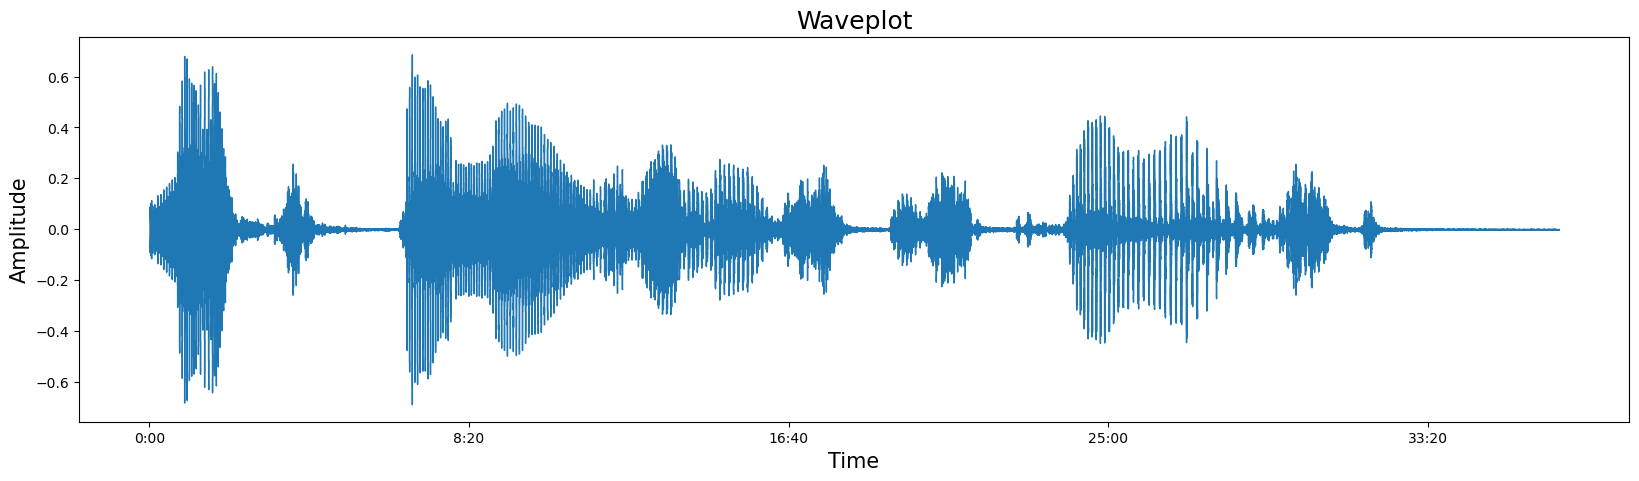

In [5]:
#Waveplot
plt.figure(figsize=(20,5)); sr=20
librosa.display.waveshow(real_train.waves[0],sr=sr)
plt.title('Waveplot',fontdict=dict(size=18))
plt.xlabel('Time',fontdict=dict(size=15))
plt.ylabel('Amplitude',fontdict=dict(size=15))

In [6]:
md=prepdata(real_train,fake_train)
X_train,y_train=md.X,md.y

In [7]:
cd D:\Users\Leal\Desktop\MSc ASA\Semester 3\Data Driven Analytics - 3

D:\Users\Leal\Desktop\MSc ASA\Semester 3\Data Driven Analytics - 3


In [8]:
filelist=files_name(real_train,fake_train)
filelist.to_csv('Training Files.csv',index=False)

In [9]:
sptn=X_train.shape
sptn

(13956, 10, 87)

In [10]:
from tensorflow import keras
kt=keras.layers

In [11]:
model=keras.Sequential([
    kt.Flatten(input_shape=tuple(sptn[1:])),
    kt.Dense(100,activation='relu'),
    kt.Dense(100,activation='relu'),
    kt.Dense(100,activation='relu'),
    kt.Dense(1,activation='sigmoid'),
])

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
437/437 [==============================] - 3s 4ms/step - loss: 0.7229 - accuracy: 0.6598
Epoch 2/20
437/437 [==============================] - 2s 4ms/step - loss: 0.5495 - accuracy: 0.7169
Epoch 3/20
437/437 [==============================] - 2s 4ms/step - loss: 0.5295 - accuracy: 0.7328
Epoch 4/20
437/437 [==============================] - 2s 4ms/step - loss: 0.5120 - accuracy: 0.7462
Epoch 5/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4890 - accuracy: 0.7638
Epoch 6/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4716 - accuracy: 0.7721
Epoch 7/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4587 - accuracy: 0.7804
Epoch 8/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4465 - accuracy: 0.7871
Epoch 9/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4321 - accuracy: 0.7936
Epoch 10/20
437/437 [==============================] - 2s 4ms/step - loss: 0.4191 - accuracy: 0.8026

In [14]:
#SVM Model

#from sklearn.svm import SVC  
#clf=SVC(kernel='linear') 

#X,y=prepfeat(real_train,fake_train)

#clf.fit(X,y)